<a href="https://colab.research.google.com/github/taciturn02/CreditCardFruadDetection/blob/main/creditCard_fraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Read the Data

In [ ]:
train_df = pd.read_csv("/content/drive/MyDrive/CreditCard_DataSet/fraudTest.csv")

*Viewing* the data

In [ ]:
train_df.head()


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


analysing the data i.e. Checking the datatypes of varios features

In [ ]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [ ]:
train_df.describe( include = "all")


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-12-19 16:02:22,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


Checking for missing values

In [ ]:
train_df.isna().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Checking for NULL values

In [ ]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Checking for any Duplicates.

In [ ]:
train_df.duplicated().sum()

0


Converting Trans_date_trans_time to Day,Month,Hour

In [ ]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'],format='mixed')

In [ ]:
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['day'] = train_df['trans_date_trans_time'].dt.day_name()
train_df['month'] = train_df['trans_date_trans_time'].dt.month
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,6
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,6
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,6
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday,6
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,Sunday,6


Finding current age of the customer



In [ ]:
train_df['dob'] = pd.to_datetime(train_df['dob'],format='mixed')
train_df['age_cust'] = (train_df['trans_date_trans_time'].dt.year - train_df['dob'].dt.year).astype(int)
train_df.drop(columns='dob',inplace=True)


In [ ]:
train_df.head(4)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,6,52
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,6,30
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,6,50
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday,6,33


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

In [ ]:
train_df['is_fraud'].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

In [ ]:
cdf = train_df[train_df['amt']>600]
cdf['amt'].value_counts().sum()

4166

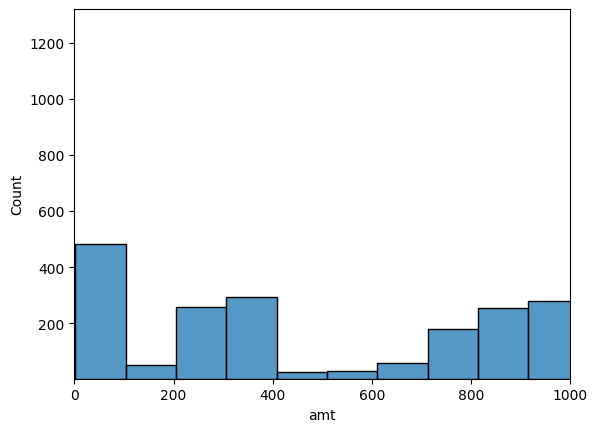

In [ ]:
fdf = train_df[train_df['is_fraud']==1]
sns.histplot(fdf['amt'])
plt.xlim(0,1000)
plt.ylim(fdf['amt'].min(),fdf['amt'].max())
plt.show()

In [ ]:
fdf['state'].value_counts()

state
NY    175
PA    114
TX    113
CA     76
IL     76
VA     75
IN     75
MN     73
MO     71
IA     69
KY     67
WI     65
AL     63
MI     61
GA     58
OK     57
MS     54
FL     53
OR     48
NC     46
MD     46
NJ     43
SC     43
CT     40
NM     39
OH     39
MT     37
KS     37
NE     36
AR     34
WA     30
AZ     27
ND     27
LA     22
ID     22
NH     20
TN     19
MA     18
SD     18
ME     15
AK     14
DC     10
WY      9
HI      9
CO      2
Name: count, dtype: int64

Removing Unnecessary Features

In [ ]:
dropColumn =["Unnamed: 0","trans_date_trans_time","cc_num","trans_num","unix_time","first","last","street","city","state"]
train_df.drop(dropColumn,axis = 1,inplace = True)


In [ ]:
train_df.head(5)

,merchant,category,amt,gender,zip,lat,long,city_pop,job,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,fraud_Kirlin and Sons,personal_care,2.86,M,29209,33.9659,-80.9355,333497,Mechanical engineer,33.986391,-81.200714,0,12,Sunday,6,52
1,fraud_Sporer-Keebler,personal_care,29.84,F,84002,40.3207,-110.4360,302,"Sales professional, IT",39.450498,-109.960431,0,12,Sunday,6,30
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,11710,40.6729,-73.5365,34496,"Librarian, public",40.495810,-74.196111,0,12,Sunday,6,50
3,fraud_Haley Group,misc_pos,60.05,M,32780,28.5697,-80.8191,54767,Set designer,28.812398,-80.883061,0,12,Sunday,6,33
4,fraud_Johnston-Casper,travel,3.19,M,49632,44.2529,-85.0170,1126,Furniture designer,44.959148,-85.884734,0,12,Sunday,6,65


Gender-wise fraud plot

<Axes: xlabel='gender', ylabel='count'>

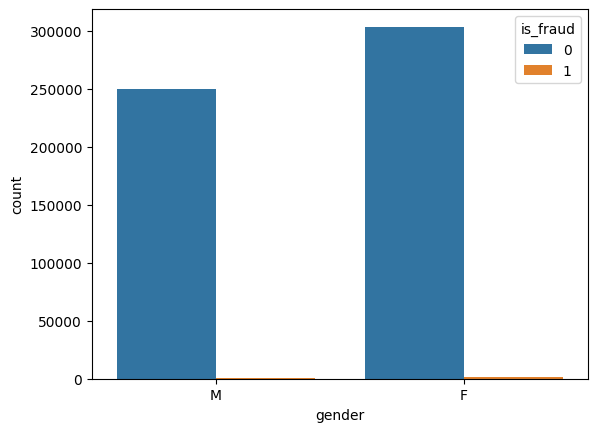

In [ ]:
sns.countplot(x= train_df["gender"],hue = "is_fraud",data = train_df)


Day-Wise fraud plot

<Axes: xlabel='day', ylabel='count'>

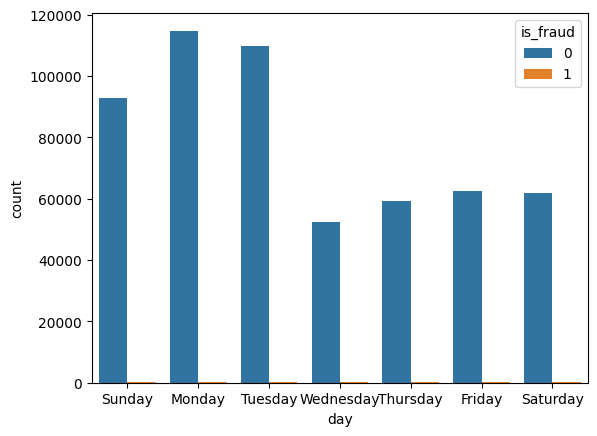

In [ ]:
sns.countplot(x= train_df["day"],hue = "is_fraud",data = train_df)


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  object 
 1   category    555719 non-null  object 
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  object 
 4   zip         555719 non-null  int64  
 5   lat         555719 non-null  float64
 6   long        555719 non-null  float64
 7   city_pop    555719 non-null  int64  
 8   job         555719 non-null  object 
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
 12  hour        555719 non-null  int32  
 13  day         555719 non-null  object 
 14  month       555719 non-null  int32  
 15  age_cust    555719 non-null  int64  
dtypes: float64(5), int32(2), int64(4), object(5)
memory usage: 63.6+ MB


FEATURE ENCODING

>



In [ ]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train_df['merchant']= label_encoder.fit_transform(train_df['merchant'])
train_df['job']= label_encoder.fit_transform(train_df['job'])
train_df['category']= label_encoder.fit_transform(train_df['category'])
train_df['gender']= label_encoder.fit_transform(train_df['gender'])
train_df['day']= label_encoder.fit_transform(train_df['day'])


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 16 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  int64  
 1   category    555719 non-null  int64  
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  int64  
 4   zip         555719 non-null  int64  
 5   lat         555719 non-null  float64
 6   long        555719 non-null  float64
 7   city_pop    555719 non-null  int64  
 8   job         555719 non-null  int64  
 9   merch_lat   555719 non-null  float64
 10  merch_long  555719 non-null  float64
 11  is_fraud    555719 non-null  int64  
 12  hour        555719 non-null  int32  
 13  day         555719 non-null  int64  
 14  month       555719 non-null  int32  
 15  age_cust    555719 non-null  int64  
dtypes: float64(5), int32(2), int64(9)
memory usage: 63.6 MB


Check For Imbalanced Data

In [ ]:
train_df["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

Data is highly unbalanced. We need to balance the data.


Plot the unbalanced Data.

<Axes: xlabel='is_fraud', ylabel='count'>

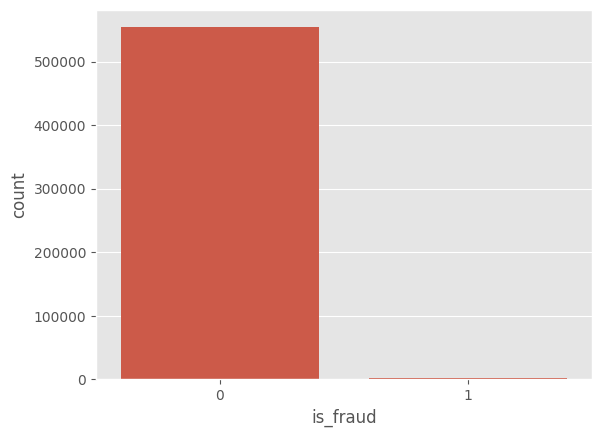

In [ ]:
plt.style.use("ggplot")
sns.countplot(x= train_df["is_fraud"])

In [ ]:
train_df2 = pd.DataFrame(train_df)
train_df2.to_csv('/content/drive/My Drive/CreditCard_DataSet/Dataset_For_Smote.csv', index=False)


In [ ]:

x_train = train_df.drop(columns=["is_fraud"])
y_train = train_df['is_fraud']

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
rfc = rfc.fit(x_train, y_train)
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

feature_names = list(x_train.columns)
print("Feature ranking:")
for f in range(x_train.shape[1]):
    print("%d. feature %s (%f)" % (f + 1, feature_names[indices[f]], importances[indices[f]]))